In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [18]:
## Leitura dos dados
df = pd.read_csv('dados/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise Exploratória

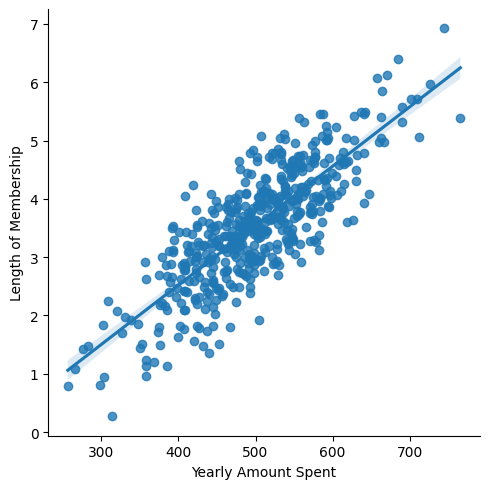

In [50]:
sns.lmplot(df, x='Yearly Amount Spent', y='Length of Membership');

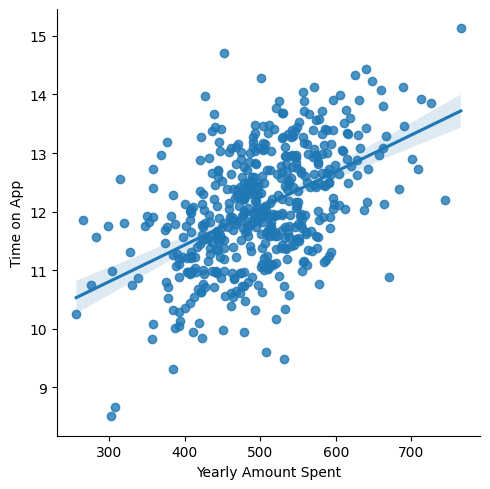

In [52]:
sns.lmplot(df, x='Yearly Amount Spent', y='Time on App');

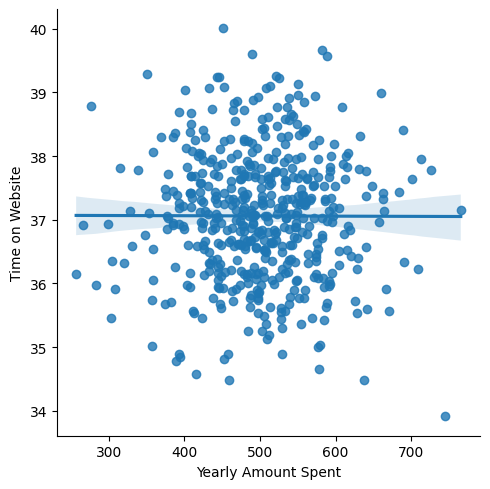

In [53]:
sns.lmplot(df, x='Yearly Amount Spent', y='Time on Website');

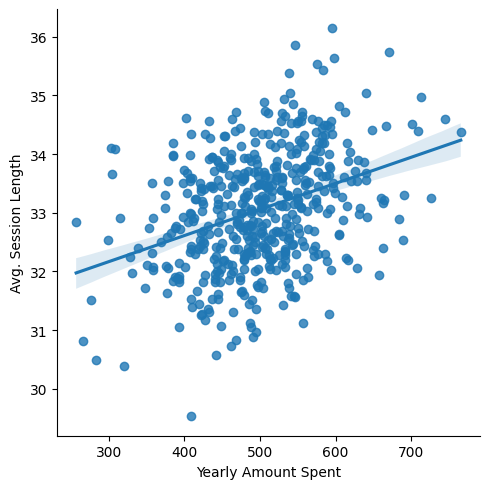

In [54]:
sns.lmplot(df, x='Yearly Amount Spent', y='Avg. Session Length');

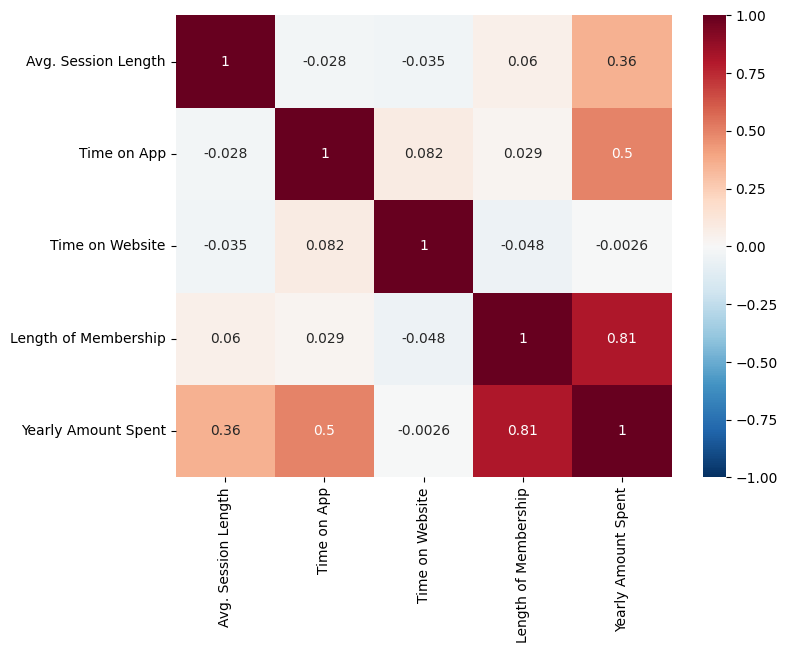

In [25]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

fig = plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), cmap='RdBu_r', vmin=-1, vmax=1, annot=True);

## Ajuste do Modelo 

In [29]:
y = df['Yearly Amount Spent']

df['intercepto'] = 1
x = df[['intercepto', 'Length of Membership']]

In [30]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()

In [31]:
print(resultado.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Sun, 09 Jun 2024   Prob (F-statistic):          4.81e-117
Time:                         17:31:48   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercepto            

In [39]:
x = df[['intercepto', 'Length of Membership', 'Time on App']]

In [40]:
modelo = sm.OLS(y, x)
resultado = modelo.fit()

In [41]:
print(resultado.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.881
Model:                             OLS   Adj. R-squared:                  0.881
Method:                  Least Squares   F-statistic:                     1842.
Date:                 Sun, 09 Jun 2024   Prob (F-statistic):          1.38e-230
Time:                         17:35:00   Log-Likelihood:                -2363.2
No. Observations:                  500   AIC:                             4732.
Df Residuals:                      497   BIC:                             4745.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercepto            

## Diagnóstico do Modelo: Análise dos Resíduos

In [42]:
def grafico_residuos(resultado):
    # Criando o gráfico de resíduos
    resid_graf = sns.scatterplot(x=list(range(0, len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())

    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1

    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1

    resid_graf.set(ylim=(ymin, ymax))

    ax1 = resid_graf.axes
    ax1.axhline(0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    
    plt.show()

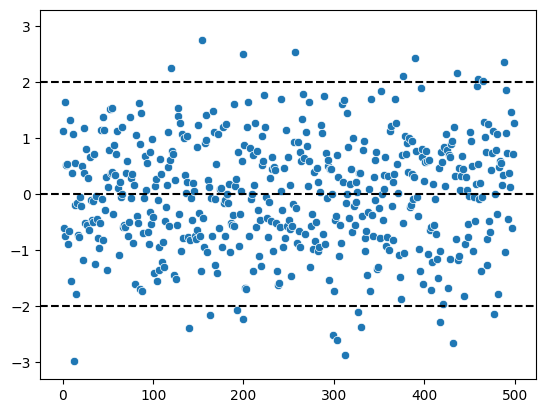

In [43]:
grafico_residuos(resultado)

## Normalidade dos Resíduos

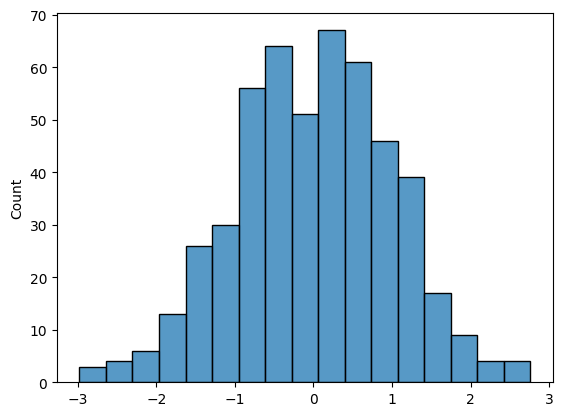

In [44]:
sns.histplot(resultado.resid_pearson);

In [45]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print(f'Estatística={normalidade.statistic:.3f}, p-valor={normalidade.pvalue:.3f}')

Estatística=0.997, p-valor=0.527


## Homoscedasticidade dos Resíduos

In [46]:
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [47]:
white_test = het_white(resultado.resid_pearson, resultado.model.exog)

In [48]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 0.18273366446575068, 'LM-Test p-value': 0.9992885655786682, 'F-Statistic': 0.03612137328024448, 'F-Test p-value': 0.9993037550275828}
